# Python and Pandas

[Pandas](https://pandas.pydata.org/) is a Python library for data analysis. It can bread data from a variety of sources (CSV, Excel, databases, etc) and store the data in a DataFrame.

## Load from CSV

To load data from a CSV file into a Data Frame you can use the `read_csv` function.

In [2]:
import pandas as pd

df = pd.read_csv('plotly_iris.csv')
df.head(4)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1

Here `df.head(4)` will select out only the first 4 rows of the data frame. You can leave as `df` to see more information.

In [6]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

## Load from JSON

To load data from JSON files, you can use the `json_normalize` function. However, you will have to first load all the JSON data into memory using the below `read_json` function.

In [3]:
from pathlib import Path
from os import path
import json

def read_json(directory):
    data = []
    for file in Path(directory).glob('*'):
        with open(file) as f:
            json_obj = json.load(f)
            json_obj['filename'] = path.basename(file)
            data.append(json_obj)
    return data

Once this function is defined, you can use it to read in all the JSON files in the `json/` directory.

In [4]:
data = read_json('json/')
pd.json_normalize(data).set_index('filename')

timestamp geo_area_code     geo_area_name  \
filename                                                               
file1     2020-08-01 13:12:11.123456            15         Antartica   
file2     2020-08-02 13:12:11.123456            15  Northern America   
file3     2020-08-05 13:12:11.123456            15            Oceana   

                                                   rgi_main  \
filename                                                      
file1     [{'Cut_Off': 'Perfect', 'Pass_Bitscore': '100'...   
file2     [{'Cut_Off': 'Perfect', 'Pass_Bitscore': '100'...   
file3     [{'Cut_Off': 'Perfect', 'Pass_Bitscore': '100'...   

                                                   rgi_kmer  \
filename                                                      
file1     [{'CARD*kmer Prediction': 'Enterobacteriaceae ...   
file2     [{'CARD*kmer Prediction': 'Enterobacteriaceae ...   
file3     [{'CARD*kmer Prediction': 'Enterobacteriaceae ...   

                                                     mlst  \
filename                                                    
file1     [{'scheme': 'senterica', 'sequence_type': '-'}]   
file2     [{'scheme': 'senterica', 'sequence_type': '-'}]   
file3     [{'scheme': 'senterica', 'sequence_type': '-'}]   

                                                       lmat  
filename                                                     
file1     [{'score': '100', 'count': '100', 'ncbi_taxon_...  
file2     [{'score': '100', 'count': '100', 'ncbi_taxon_...  
file3     [{'score': '100', 'count': '100', 'ncbi_taxon_...

# Manipulating data in a data frame

The pandas library can be used to select and manipulate data stored in a data frame. For example, you can select specific columns from the previously loaded table (representing data about different flowers) like below:

In [9]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

You can count the unique rows with `value_counts()`.

In [10]:
df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

You can select only those rows where species is `setosa` with:

In [12]:
df[df['species'] == 'setosa']

sepal_length  sepal_width  petal_length  petal_width species  species_id
0            5.1          3.5           1.4          0.2  setosa           1
1            4.9          3.0           1.4          0.2  setosa           1
2            4.7          3.2           1.3          0.2  setosa           1
3            4.6          3.1           1.5          0.2  setosa           1
4            5.0          3.6           1.4          0.2  setosa           1
5            5.4          3.9           1.7          0.4  setosa           1
6            4.6          3.4           1.4          0.3  setosa           1
7            5.0          3.4           1.5          0.2  setosa           1
8            4.4          2.9           1.4          0.2  setosa           1
9            4.9          3.1           1.5          0.1  setosa           1
10           5.4          3.7           1.5          0.2  setosa           1
11           4.8          3.4           1.6          0.2  setosa           1
12           4.8          3.0           1.4          0.1  setosa           1
13           4.3          3.0           1.1          0.1  setosa           1
14           5.8          4.0           1.2          0.2  setosa           1
15           5.7          4.4           1.5          0.4  setosa           1
16           5.4          3.9           1.3          0.4  setosa           1
17           5.1          3.5           1.4          0.3  setosa           1
18           5.7          3.8           1.7          0.3  setosa           1
19           5.1          3.8           1.5          0.3  setosa           1
20           5.4          3.4           1.7          0.2  setosa           1
21           5.1          3.7           1.5          0.4  setosa           1
22           4.6          3.6           1.0          0.2  setosa           1
23           5.1          3.3           1.7          0.5  setosa           1
24           4.8          3.4           1.9          0.2  setosa           1
25           5.0          3.0           1.6          0.2  setosa           1
26           5.0          3.4           1.6          0.4  setosa           1
27           5.2          3.5           1.5          0.2  setosa           1
28           5.2          3.4           1.4          0.2  setosa           1
29           4.7          3.2           1.6          0.2  setosa           1
30           4.8          3.1           1.6          0.2  setosa           1
31           5.4          3.4           1.5          0.4  setosa           1
32           5.2          4.1           1.5          0.1  setosa           1
33           5.5          4.2           1.4          0.2  setosa           1
34           4.9          3.1           1.5          0.1  setosa           1
35           5.0          3.2           1.2          0.2  setosa           1
36           5.5          3.5           1.3          0.2  setosa           1
37           4.9          3.1           1.5          0.1  setosa           1
38           4.4          3.0           1.3          0.2  setosa           1
39           5.1          3.4           1.5          0.2  setosa           1
40           5.0          3.5           1.3          0.3  setosa           1
41           4.5          2.3           1.3          0.3  setosa           1
42           4.4          3.2           1.3          0.2  setosa           1
43           5.0          3.5           1.6          0.6  setosa           1
44           5.1          3.8           1.9          0.4  setosa           1
45           4.8          3.0           1.4          0.3  setosa           1
46           5.1          3.8           1.6          0.2  setosa           1
47           4.6          3.2           1.4          0.2  setosa           1
48           5.3          3.7           1.5          0.2  setosa           1
49           5.0          3.3           1.4          0.2  setosa           1

Additional information can be found in the [pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html).

If you are familiar with other languages (like SQL or R) you can compar the pandas syntax to these [here](https://pandas.pydata.org/docs/getting_started/comparison/index.html).

# Plotting with `matplotlib`

The [matplotlib](https://matplotlib.org/) package can be used to produce plots from data frames. Pandas includes the function `plot()`, which can be run on a data frame to produce a plot using matplotlib (see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for details).

For example to produce a scatter plot of `petal_length` vs `sepal_width` you can run:

<AxesSubplot:xlabel='petal_length', ylabel='sepal_width'>

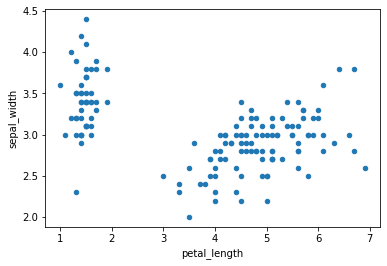

In [4]:
df.plot(kind='scatter', x='petal_length', y='sepal_width')

# Interactive plots with `plotly`

[Plotly](https://plotly.com/python/) is another package which can be used to produce interactive plots. It has support for a variety of languages (such as R and JavaScript) but I will use the Python varient.

To produce the same scatter plot as above, the following command can be used.

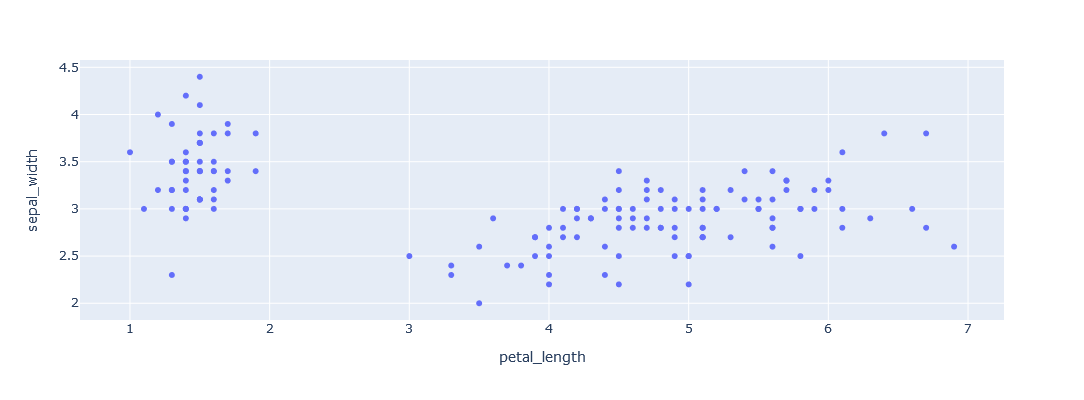

In [5]:
import plotly.express as px

fig = px.scatter(df,
       x='petal_length',
       y='sepal_width',
       height=400,
       width=500
)
fig.show()

This should show an interactive plotly scatterplot directly in Juptyer.

*Note, for this to show up in Jupyter you will have needed to install the Juptyer plotly extension <https://plotly.com/python/getting-started/#jupyterlab-support-python-35>, which should have been handled when installing all the dependencies*.

# Geographic analysis with `geopandas`

For plotting geographic data, we can use the [geopandas](https://geopandas.org/) library.

The first step is to read in a map. Lucikly geopandas comes with a map by default. This will return a `GeoDataFrame` containing information about each country and polygons defining the shape of each country.

In [20]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

To plot this information we can use the `plot()` function (note this uses the [descartes](https://bitbucket.org/sgillies/descartes/) package in Python).

<AxesSubplot:>

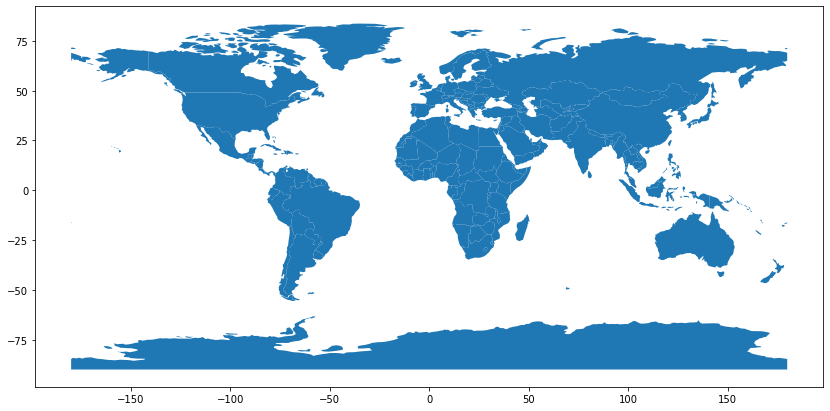

In [21]:
world.plot(figsize=(20, 7))

We can select a column in the data frame to colour each country (a [choropleth map](https://geopandas.org/mapping.html#choropleth-maps)).

<AxesSubplot:>

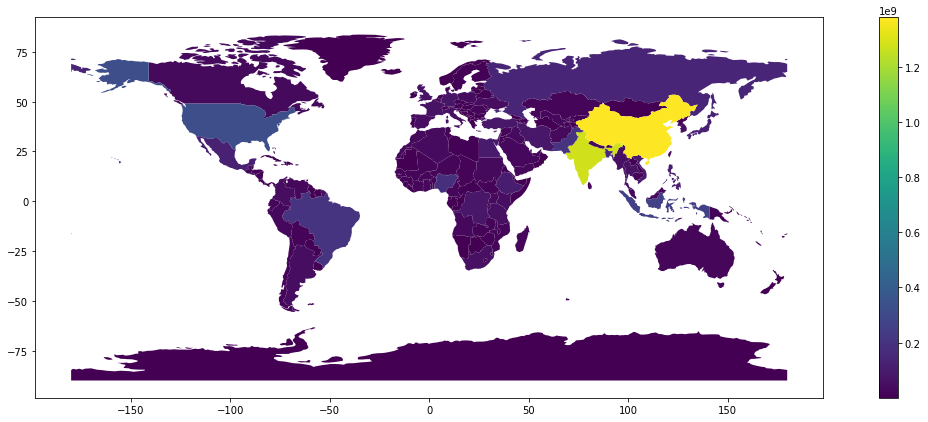

In [22]:
world.plot(column='pop_est', legend=True, figsize=(20, 7))

# Aggregate regions

If the data you wish to plot is not at the level of country but at some other level (e.g., continent) then you can use the `dissolve()` function to merge different regions together.

In [23]:
world_aggregate = world.dissolve(by='continent', aggfunc='sum')
world_aggregate

geometry  \
continent                                                                    
Africa                   MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...   
Antarctica               MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
Asia                     MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
Europe                   MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
North America            MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   
Oceania                  MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...   
Seven seas (open ocean)  POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...   
South America            MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...   

                            pop_est   gdp_md_est  
continent                                         
Africa                   1219176238   6025295.50  
Antarctica                     4050       810.00  
Asia                     4389144868  55434607.77  
Europe                    746398461  25284877.00  
North America             573042112  23505137.00  
Oceania                    36782844   1412885.00  
Seven seas (open ocean)         140        16.00  
South America             418540749   6377091.80

Now we can plot the merged regions and the map will display information at the level of continents instead of countries.

<AxesSubplot:>

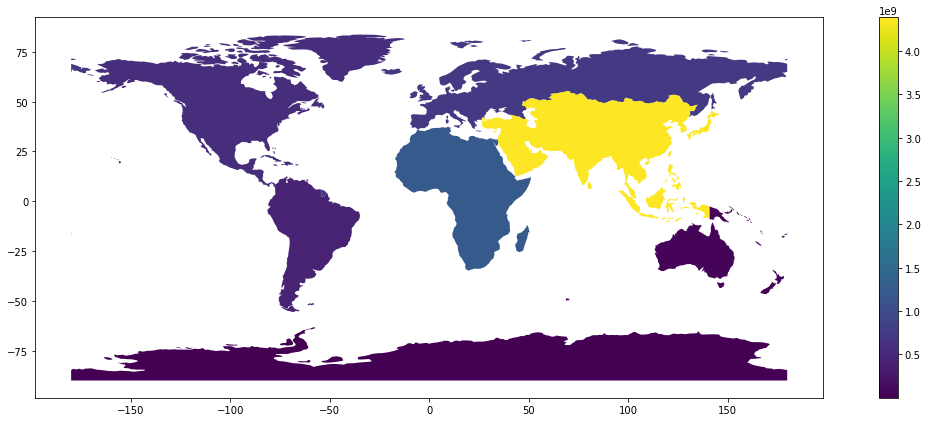

In [24]:
world_aggregate.plot(column='pop_est', legend=True, figsize=(20, 7))

# Geographic data in plotly

Plotly also allows for plotting geographic data using a variety of methods (see [here](https://plotly.com/python/maps/) for details). We will be looking at a basic choropleth map.

First, let's extract some example data that comes with plotly (note some of this is taken from the [plotly tutorial](https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries)).

In [15]:
import plotly.express as px

df_gapminder = px.data.gapminder().query("year==2007")
df_gapminder

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

Now that we've got some data, let's plot using plotly.

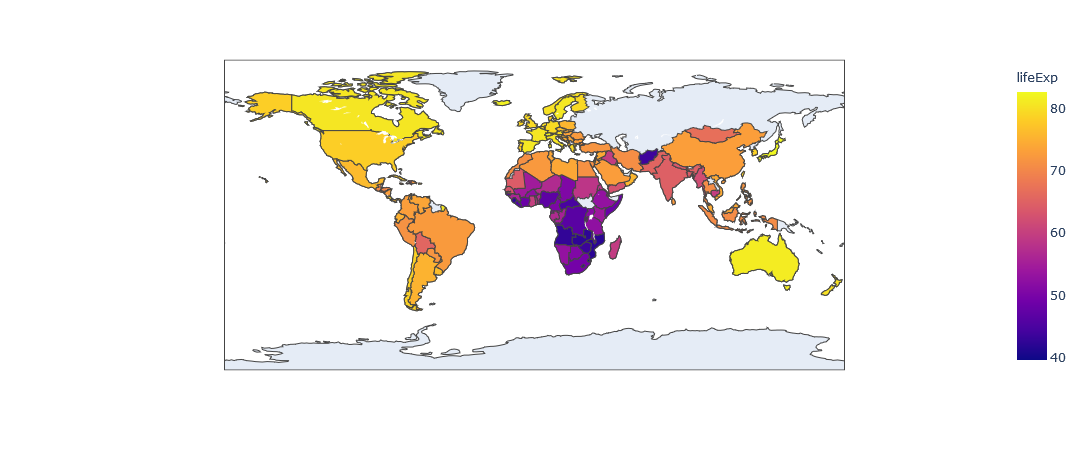

In [17]:
fig = px.choropleth(df_gapminder, locations="iso_alpha",
                    color="lifeExp", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Awesome :). You should now see an interactive choropleth map.

# Plotly maps at continent level

The previous map (and data frame) was all at the country level. But what if you want to plot regions at the level of continents? The default map that comes with plotly only indexes at the country level, but you can pass alternative maps indexed at other levels. In particular you can pass the previously aggregated data from `geopandas` (as a GeoDataFrame) into the plotly function.

Let's do this now. First we'll select some data from the `world_aggregate` data frame previously generated.

In [25]:
data = world_aggregate.reset_index()[['continent', 'pop_est']]
data

continent     pop_est
0                   Africa  1219176238
1               Antarctica        4050
2                     Asia  4389144868
3                   Europe   746398461
4            North America   573042112
5                  Oceania    36782844
6  Seven seas (open ocean)         140
7            South America   418540749

We'll also show the full contents of the `world_aggregate` data frame.

In [12]:
world_aggregate

geometry  \
continent                                                                    
Africa                   MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...   
Antarctica               MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
Asia                     MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
Europe                   MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
North America            MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   
Oceania                  MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...   
Seven seas (open ocean)  POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...   
South America            MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...   

                            pop_est   gdp_md_est  
continent                                         
Africa                   1219176238   6025295.50  
Antarctica                     4050       810.00  
Asia                     4389144868  55434607.77  
Europe                    746398461  25284877.00  
North America             573042112  23505137.00  
Oceania                    36782844   1412885.00  
Seven seas (open ocean)         140        16.00  
South America             418540749   6377091.80

Now we can plot out this aggregated geographic information in plotly by passing `geojson=world_aggregate` to the function to define the custom map (you can pass a GeoDataFrame here and it will automatically get converted to a geojson object).

You will also have to define the column in the `data` data frame which contains the locations (here `locations='continent'`).

*Note that by default, when passing a GeoDataFrame plotly assumes the frame's index (here it's **continent** for the `world_aggregate` data frame) defines the text identifiers for each individual geographic region. There are ways to override this in plotly.*

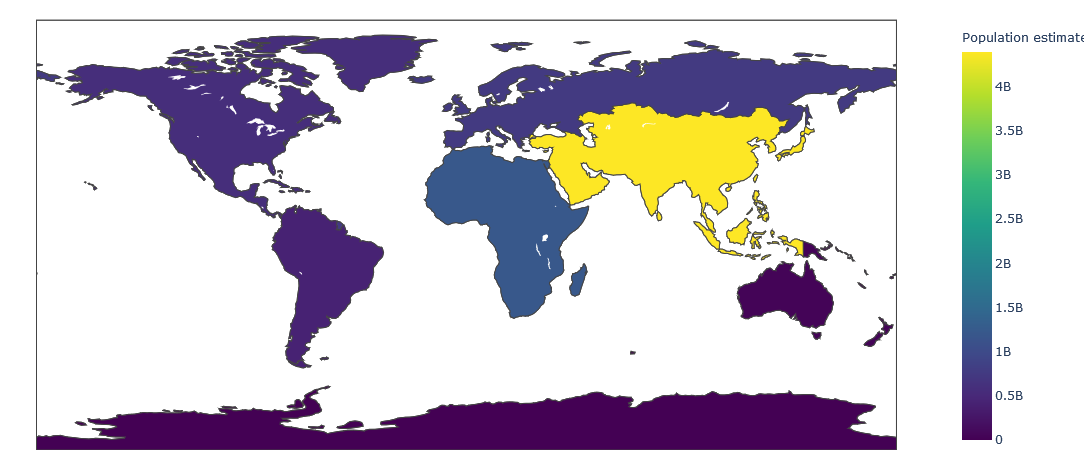

In [26]:
fig = px.choropleth(data,
        geojson=world_aggregate,
        locations='continent',
        color='pop_est',
        color_continuous_scale='Viridis',
        labels={
          'pop_est': 'Population estimate'
        },
        hover_data=['continent'],
        center={'lat': 0, 'lon': 0.01},
)
fig.update_traces(
    hovertemplate=(
    '<b style="font-size: 125%;">'
        '%{customdata[0]}</b>'
    '<br>'
    '<b>Population:</b> %{z}'
    '<br>'
    )
)
fig.update_layout(margin=
                  {"r":0,"t":20,
                   "l":0,"b":0})
fig.show()

And now we have an interactive map using `plotly` at the continent level.

# Plotting other data (advanced)

If your data is stored in a different data frame (e.g., the gapminder data) you can still use that in plotly but you will have to make sure the location names match the locations in the map and are unique.

Let's look at the gapminder data again:

In [27]:
df_gapminder

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

Since we have a column `continent` we can use this to match up with the geographic regions. But, there are multiple rows with the same continent so we'll have to aggregate this data first.

As an example, let's say we wanted to display the maximum `lifeExp` for a continent on the map. To do this we have to aggregate this data frame and select the max `lifeExp` per continent. Let's do this now (you can look up the corresponding functions in the `pandas` documentation).

In [34]:
df_gapminder_aggregate = df_gapminder.groupby('continent').agg('max').reset_index()
df_gapminder_aggregate

continent         country  year  lifeExp         pop    gdpPercap iso_alpha  \
0    Africa        Zimbabwe  2007   76.442   135031164  13206.48452       ZWE   
1  Americas       Venezuela  2007   80.653   301139947  42951.65309       VEN   
2      Asia     Yemen, Rep.  2007   82.603  1318683096  47306.98978       YEM   
3    Europe  United Kingdom  2007   81.757    82400996  49357.19017       TUR   
4   Oceania     New Zealand  2007   81.235    20434176  34435.36744       NZL   

   iso_num  
0      894  
1      862  
2      887  
3      826  
4      554

This gives me a data frame where all columns are aggregated by the `continent` and only the maximum value for each continent is selected (I then `reset_index()` so that `continent` appears as a column instead of an index. This is used since plotly requires the locations to be a column in the data frame and not an index (i.e., name of a row)).

Now that we have our data we can create the map in plotly:

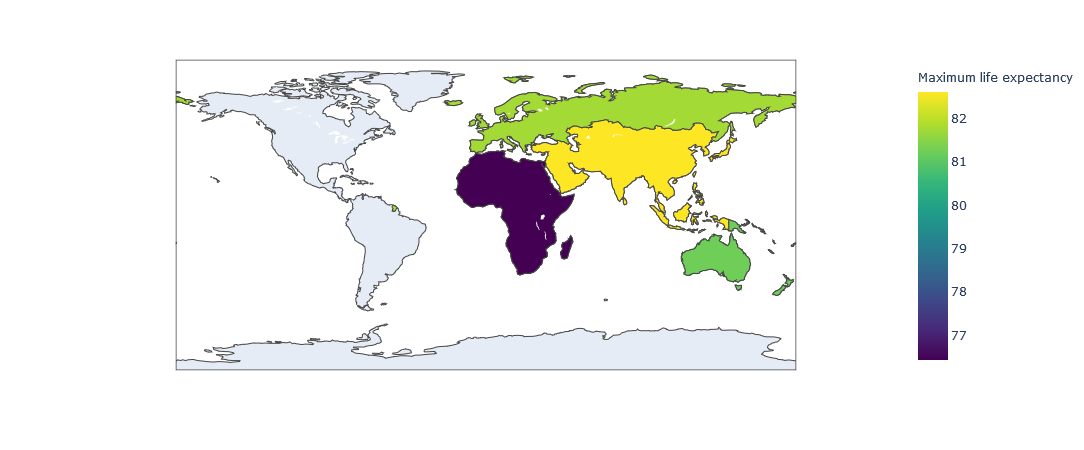

In [35]:
fig = px.choropleth(df_gapminder_aggregate,
        geojson=world_aggregate,
        locations='continent',
        color='lifeExp',
        color_continuous_scale='Viridis',
        labels={
          'lifeExp': 'Maximum life expectancy'
        },
        center={'lat': 0, 'lon': 0.01},
)
fig.show()

Awesome, we have maximum life expencency data in a plotly map now. Note that not all continents were found in the origional gapminder data so not all continents appear in the map.

# Dash

Python [Dash](https://plotly.com/dash/) can be used to organize plotly plots into a web page and server using a Python-based web server.

Lets build a dash web page now.

*Note: I haven't quite gotten Dash to work with mybinder, so if you are following the tutorial there this below code won't work. You will have to install the dependencies and start up Juptyer locally for this to work.*

In [37]:
from dash import Dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

# This function just builds the plotly figures
def create_figures(data, world_aggregate):
    fig_map = px.choropleth(data,
            geojson=world_aggregate,
            locations='continent',
            height=200,
            color='pop_est',
            color_continuous_scale='Viridis',
            labels={
              'pop_est': 'Population estimate'
            },
            hover_data=['continent'],
            center={'lat': 0, 'lon': 0.01},
    )
    fig_map.update_traces(
        hovertemplate=(
        '<b style="font-size: 125%;">'
            '%{customdata[0]}</b>'
        '<br>'
        '<b>Population:</b> %{z}'
        '<br>'
        ),
    )
    fig_map.update_layout(margin=
                      {"r":0,"t":20,
                       "l":0,"b":0})
    
    df = pd.read_csv('plotly_iris.csv')
    
    fig_scatter = px.scatter(df,
       x='petal_length',
       y='sepal_width',
       height=400,
       width=500
    )
    
    return (fig_map, fig_scatter)

# Figures
fig_map, fig_scatter = create_figures(data,
                                      world_aggregate)

# Dash instance
# Change from 'JupyterDash' to 'Dash' when outside of JupyterLab
app = JupyterDash(__name__)

# HTML layout
app.layout = html.Div(children=[
    html.H1(children='Example Dash app'),
    html.Div(children='An example Dash application'),
    dcc.Graph(
        id='fig-map-id',
        figure=fig_map
    ),
    dcc.Graph(
        id='fig-scatter-id',
        figure=fig_scatter
    ),
])

# Web server
# Remove 'mode="jupyterlab"' when outside of Jupyter
app.run_server(mode='jupyterlab')

If everything goes well (and you have the `jupyter-dash` plugin installed) you should see another tab appear in Juptyer with the dash web page.

This code can be saved as a standalone Python `.py` file and run outside of Jupyter (assuming you replace the listed instances of Jupyter in the code).

# Dash callbacks

Dash [callbacks](https://dash.plotly.com/basic-callbacks) allow you to define interactive components (e.g., dropdown menus) on your dash web page. The following code adds a Dash callback for a dropdown menu to switch the colour of the map.

In [17]:
from dash import Dash
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

def create_map(data, world_aggregate, colour_scale):
    fig_map = px.choropleth(data,
            geojson=world_aggregate,
            locations='continent',
            height=400,
            color='pop_est',
            color_continuous_scale=colour_scale,
            labels={
              'pop_est': 'Population estimate'
            },
            hover_data=['continent'],
            center={'lat': 0, 'lon': 0.01},
    )
    fig_map.update_traces(
        hovertemplate=(
        '<b style="font-size: 125%;">'
            '%{customdata[0]}</b>'
        '<br>'
        '<b>Population:</b> %{z}'
        '<br>'
        ),
    )
    fig_map.update_layout(margin=
                      {"r":0,"t":20,
                       "l":0,"b":0})
    
    return fig_map

# Figures
fig_map = create_map(data, world_aggregate, 'Viridis')

# Dash instance
# Change from 'JupyterDash' to 'Dash' when outside of JupyterLab
app = JupyterDash(__name__)

# HTML layout
app.layout = html.Div(children=[
    html.H1(children='Example Dash with callback'),
    'Select a colour:',
    dcc.Dropdown(id='colour-select',
                options=[
                    {'label': 'Viridis', 'value': 'viridis'},
                    {'label': 'Orange red', 'value': 'orrd'},
                    {'label': 'Yellow green blue', 'value': 'ylgnbu'}
                ],
                value='viridis',
                clearable=False,
                style={'width': '50%'}),
    dcc.Graph(
        id='fig-map-id',
        figure=fig_map
    ),
])

@app.callback(
    Output('fig-map-id', 'figure'),
    [Input('colour-select', 'value')],
)
def switch_colour(colour_select):
    return create_map(data, world_aggregate, colour_select)

# Web server
# Remove 'mode="jupyterlab"' when outside of Jupyter
app.run_server(mode='jupyterlab')

# Conclusion

Awesome. You've made it through this tutorial :). This should hopefully provide you with some basics for how to do data analysis and visaulization in Python. Please refer to the documentation for the individual packages for more details.